In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [5]:
df = pd.read_excel('foil.xlsx')

In [6]:
x = df['x']
y = df['y']

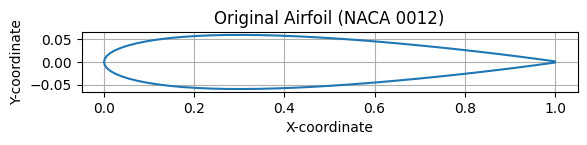

In [7]:
plt.plot(x,y)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Airfoil (NACA 0012)')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

In [8]:
x = df['x'].values
y = df['y'].values

In [9]:
from numpy import nan

In [10]:
x = x[np.logical_not(np.isnan(x))]
y = y[np.logical_not(np.isnan(y))]

In [11]:
x

array([1.      , 0.998459, 0.993844, 0.986185, 0.975528, 0.96194 ,
       0.945503, 0.92632 , 0.904508, 0.880203, 0.853553, 0.824724,
       0.793893, 0.761249, 0.726995, 0.691342, 0.654508, 0.616723,
       0.578217, 0.53923 , 0.5     , 0.46077 , 0.421783, 0.383277,
       0.345492, 0.308658, 0.273005, 0.238751, 0.206107, 0.175276,
       0.146447, 0.119797, 0.095492, 0.07368 , 0.054497, 0.03806 ,
       0.024472, 0.013815, 0.006156, 0.001541, 0.      , 0.001541,
       0.006156, 0.013815, 0.024472, 0.03806 , 0.054497, 0.07368 ,
       0.095492, 0.119797, 0.146447, 0.175276, 0.206107, 0.238751,
       0.273005, 0.308658, 0.345492, 0.383277, 0.421783, 0.46077 ,
       0.5     , 0.53923 , 0.578217, 0.616723, 0.654508, 0.691342,
       0.726995, 0.761249, 0.793893, 0.824724, 0.853553, 0.880203,
       0.904508, 0.92632 , 0.945503, 0.96194 , 0.975528, 0.986185,
       0.993844, 0.998459, 1.      ])

In [12]:
y

array([ 0.00126 ,  0.001476,  0.00212 ,  0.003182,  0.004642,  0.006478,
        0.008658,  0.011149,  0.013914,  0.016914,  0.020107,  0.023452,
        0.026905,  0.030423,  0.033962,  0.037476,  0.040917,  0.044237,
        0.047383,  0.050302,  0.05294 ,  0.055241,  0.057148,  0.058609,
        0.059575,  0.06    ,  0.059848,  0.059092,  0.057714,  0.055709,
        0.053083,  0.049854,  0.046049,  0.041705,  0.036867,  0.03158 ,
        0.025893,  0.019854,  0.013503,  0.006877,  0.      , -0.006877,
       -0.013503, -0.019854, -0.025893, -0.03158 , -0.036867, -0.041705,
       -0.046049, -0.049854, -0.053083, -0.055709, -0.057714, -0.059092,
       -0.059848, -0.06    , -0.059575, -0.058609, -0.057148, -0.055241,
       -0.05294 , -0.050302, -0.047383, -0.044237, -0.040917, -0.037476,
       -0.033962, -0.030423, -0.026905, -0.023452, -0.020107, -0.016914,
       -0.013914, -0.011149, -0.008658, -0.006478, -0.004642, -0.003182,
       -0.00212 , -0.001476, -0.00126 ])

In [13]:
def hicks_henne(x_coord, y_coord , n, a, w, xM):
    y_deformed = np.array(y_coord)
    for i in range(n):
        ai = a[i]
        xMi = xM[i]
        wi = w[i]
        m = np.log(0.5)/np.log(xMi)
        y_deformed += ai * np.sin(np.pi * np.array(x_coord) ** m )**wi

    return y_deformed   

In [14]:
n = 11
a = [0.03, -0.08, 0.05, -0.04, 0.03, -0.02, 0.01, -0.005, 0.003, -0.002, 0.001] 
w = np.full(11,3)  

In [15]:
xM = np.array([])
for i in range(1,n+1):
    x_m = 0.5 * (1 - math.sin(math.pi * i / n))
    xM = np.append(xM,x_m)   

In [16]:
xM

array([0.35913372, 0.22967959, 0.12212521, 0.045184  , 0.00508928,
       0.00508928, 0.045184  , 0.12212521, 0.22967959, 0.35913372,
       0.5       ])

In [17]:
y_mod = hicks_henne(x, y, n, a, w, xM)

In [18]:
y_mod

array([ 0.00126   ,  0.001476  ,  0.00212002,  0.00318224,  0.00464331,
        0.0064829 ,  0.00867216,  0.01118322,  0.01398612,  0.01705009,
        0.02034058,  0.02381992,  0.0274384 ,  0.03113215,  0.03481468,
        0.03837069,  0.04165404,  0.04449326,  0.0466973 ,  0.04807981,
        0.0484844 ,  0.04781471,  0.04606521,  0.04334843,  0.0398996 ,
        0.03605922,  0.03223964,  0.02885831,  0.02625937,  0.0246383 ,
        0.02397934,  0.02403411,  0.02434885,  0.02435742,  0.02352471,
        0.02152092,  0.01840117,  0.01470757,  0.01136049,  0.00890624,
        0.        , -0.00484776, -0.01564551, -0.02500043, -0.03338483,
       -0.04163908, -0.05020929, -0.05905258, -0.06774915, -0.07567389,
       -0.08218666, -0.0867797 , -0.08916863, -0.08932569, -0.08745636,
       -0.08394078, -0.0792504 , -0.07386957, -0.06823079, -0.06266729,
       -0.0573956 , -0.05252419, -0.0480687 , -0.04398074, -0.04017996,
       -0.03658131, -0.03310932, -0.02971385, -0.0263716 , -0.02

In [19]:
x

array([1.      , 0.998459, 0.993844, 0.986185, 0.975528, 0.96194 ,
       0.945503, 0.92632 , 0.904508, 0.880203, 0.853553, 0.824724,
       0.793893, 0.761249, 0.726995, 0.691342, 0.654508, 0.616723,
       0.578217, 0.53923 , 0.5     , 0.46077 , 0.421783, 0.383277,
       0.345492, 0.308658, 0.273005, 0.238751, 0.206107, 0.175276,
       0.146447, 0.119797, 0.095492, 0.07368 , 0.054497, 0.03806 ,
       0.024472, 0.013815, 0.006156, 0.001541, 0.      , 0.001541,
       0.006156, 0.013815, 0.024472, 0.03806 , 0.054497, 0.07368 ,
       0.095492, 0.119797, 0.146447, 0.175276, 0.206107, 0.238751,
       0.273005, 0.308658, 0.345492, 0.383277, 0.421783, 0.46077 ,
       0.5     , 0.53923 , 0.578217, 0.616723, 0.654508, 0.691342,
       0.726995, 0.761249, 0.793893, 0.824724, 0.853553, 0.880203,
       0.904508, 0.92632 , 0.945503, 0.96194 , 0.975528, 0.986185,
       0.993844, 0.998459, 1.      ])

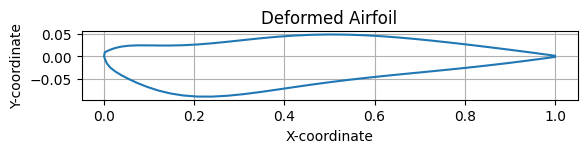

In [20]:
plt.plot(x,y_mod)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Deformed Airfoil')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

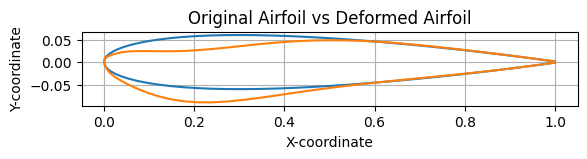

In [21]:
plt.plot(x,y)
plt.plot(x,y_mod)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Original Airfoil vs Deformed Airfoil')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.grid()

In [22]:
df1 = pd.DataFrame({'x': x, 'y_modified': y_mod} )

In [23]:
df1.head()

,x,y_modified
0,1.000000,0.001260
1,0.998459,0.001476
2,0.993844,0.002120
3,0.986185,0.003182
4,0.975528,0.004643


In [24]:
path = "C:/Users/user/OneDrive - BUET/Desktop/Deform/Deformed_airfoil.xlsx" #give the path you want save the airfoil co-ordinates in
df1.to_excel(path, index=False)